In [ ]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
/

In [1]:
"""
p.3 — I.D. who the 'key connectors' are among a network.
"""

"\np.3 — I.D. who the 'key connectors' are among a network.\n"

In [2]:
# data dump
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"}
]

In [3]:
# friendship data
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), 
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [4]:
# initialize the dict w/an empty list for each user id (looking things up in a dict is very fast):
friendships = {user["id"]: [] for user in users}

In [5]:
friendships

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [6]:
# loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
    friendships[i].append(j) # Add j as friend of user i
    friendships[j].append(i) # Add i as friend of user j

In [7]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [8]:
# Ask questions like: What's the average number of connections?
# First find the total number of connections:
def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friends_ids = friendships[user_id]
    
    return len(friends_ids)

In [9]:
total_connections = sum(number_of_friends(user) 
                        for user in users)

In [10]:
total_connections

24

In [11]:
# Then divide by the number of users:
num_users = len(users) # length of the users list
avg_connections = total_connections / num_users # 24 / 10 == 2.4

In [12]:
avg_connections

2.4

In [13]:
# Find the most connected (largest number of friends)
# Create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user))
                    for user in users]

In [14]:
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [15]:
# sort the list by num_friends largest to smallest
num_friends_by_id.sort(key = lambda id_and_friends: id_and_friends[1], reverse = True)

In [16]:
# each pair is (user_id, num_friends)
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [17]:
""" What was just computed was the network's metric degree centrality """

" What was just computed was the network's metric degree centrality "

In [20]:
# to encorage more connections, sugesting friends of friends
# iterate over their friends and collect the friends' of friends
def foaf_ids_bad(user):
    """ foaf is short for "friend of a friend" """
    return [foaf_id
           for friend_id in friendships[user["id"]]
           for foaf_id in friendships[friend_id]]

In [21]:
# calling this on users[0] (Hero):
foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [23]:
print(friendships[0])
print(friendships[1])
print(friendships[2])

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [24]:
""" maybe instead we should produce a count of mutual friends,
and we should probably exclude people already known to the user """


' maybe instead we should produce a count of mutual friends,\nand we should probably exclude people already known to the user '

In [26]:
from collections import Counter # not loaded by default

In [29]:
def friends_of_friends(user):
    user_id = user["id"]
    return Counter(foaf_id
                  for friend_id in friendships[user_id] # for each of my friends
                  for foaf_id in friendships[friend_id] # find their friends
                  if foaf_id != user_id # who aren't me
                  and foaf_id not in friendships[user_id]) # and aren't my friends

In [30]:
print(friends_of_friends(users[3])) # Tells that Chi (id 3) has two mutual friends with Hero
# (id 0) and one with Clive (id 5)

Counter({0: 2, 5: 1})


In [31]:
# list of similar interests in pars (user_id, interest)
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"), 
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"), 
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learnign"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [32]:
# build a function that finds users with a certain interest:
def data_scientists_who_like(target_interest):
    """ Find the ids of all users who like the target interest. """
    return [user_id 
            for user_id, user_interest in interests
            if user_interest == target_interest]

In [33]:
data_scientists_who_like("Hadoop") # example

[0, 9]

In [34]:
""" while this works, we're probably better off building an index from interests to users: """

" while this works, we're probably better off building an index from interests to users: "

In [35]:
from collections import defaultdict

In [36]:
# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [37]:
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learnign': 

In [38]:
# and another from users to interests:
# Keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [39]:
interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learnign',
       

In [40]:
# Now it's easy to find who has the most interests in common with a given user:
# iterate over the user's interests;
# For each interest, iterate over the other users with that interest;
# Keep count of how many times we see each other user.
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest] 
        if interested_user_id != user["id"])

In [42]:
most_common_interests_with(users[0]) # example

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [43]:
""" Provide some fun facts about how much data scientists earn. Use anonymous dataset 
(salary in $ and tenure in years). """

' Provide some fun facts about how much data scientists earn. Use anonymous dataset \n(salary in $ and tenure in years). '

In [44]:
# anonymous data
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                       (48000, 0.7), (76000, 6),
                       (69000, 6.5), (76000, 7.5),
                       (60000, 2.5), (83000, 10),
                       (48000, 1.9), (63000, 4.2)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Salary')

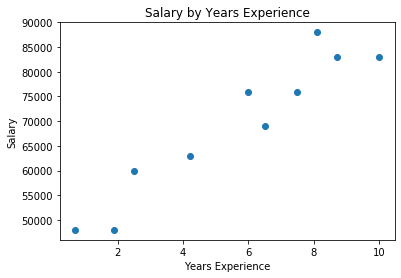

In [58]:
# The natural first step is to plot the data
# This part is not in the book
y, X = zip(*salaries_and_tenures)

plt.scatter(X, y)
plt.title("Salary by Years Experience")
plt.xlabel("Years Experience")
plt.ylabel("Salary")


In [61]:
# Look at the average salary for each tenure
# Keys are years, values are list of the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

In [62]:
salary_by_tenure

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [63]:
# Keys are years, each value is average salary for that tenure
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [64]:
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [65]:
# which turns out not to be particularly useful since none of the users have the same tenure.
# it might be more helpful to bucket the tenures
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and 5"
    else:
        return "more than five"

In [66]:
# group together the salaries corresponding to each bucket
# Keys are tenure buckets, values are lists of salaries for that bucket
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [67]:
# finally compute average salary for each group
# keys are tenure buckets, values are average salary for that bucket.
average_salary_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [68]:
average_salary_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and 5': 61500.0}

In [69]:
"""
We chose the buckets in a pretty arbitrary way. What we'd really like is to make some 
statement about the salary effect — on average — of having an additional year of experience. 
This allows us to make predictions.
"""

"\nWe chose the buckets in a pretty arbitrary way. What we'd really like is to make some \nstatement about the salary effect — on average — of having an additional year of experience. \nThis allows us to make predictions.\n"

In [70]:
"""
Paid accounts: better understand which users pay for accout and which don't. Notice there
seems to be a correspondence:

0.7 paid
1.9 unpaid
2.5 paid
4.2 unpaid
6.0 unpaid
6.5 unpaid
7.5 unpaid
8.1 unpaid
8.7 paid
10.0 paid

if you wanted to create a model — though this is definitely not enough data to base a model 
on — you might try to predict "paid" for users with very few and very many years of xp.
"""

def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"
    
"""
We totally eyeballed the cutoffs.
With more data (and more mathematics), we could build a model predicting the likelyhood that
a user would pay based on his years of xp.
"""

'\nWe totally eyeballed the cutoffs.\nWith more data (and more mathematics), we could build a model predicting the likelyhood that\na user would pay based on his years of xp.\n'

In [72]:
"""
data about what topics users are most interested in. We already have the raw data (interests).

One simple (if not particularly exciting) way to find the most popular interests is to count
the words:

1. lowercase each interest (since different users may or may not capitalize their interests)
2. split into words
3. count the results
"""

words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

In [73]:
words_and_counts

Counter({'hadoop': 2,
         'big': 3,
         'data': 3,
         'hbase': 2,
         'java': 3,
         'spark': 1,
         'storm': 1,
         'cassandra': 2,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'python': 3,
         'scikit-learn': 2,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'learning': 2,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'neural': 2,
         'networks': 2,
         'deep': 1,
         'learnign': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

In [75]:
# This makes easy to count words that occur more than once:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
learning 2
neural 2
networks 2
